In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('fake_bills.csv')
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
data.describe(include = 'all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [4]:
data.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [6]:
data.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [7]:
data.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
data['margin_low'].fillna(data['margin_low'].mean(), inplace = True)

In [9]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<AxesSubplot:>

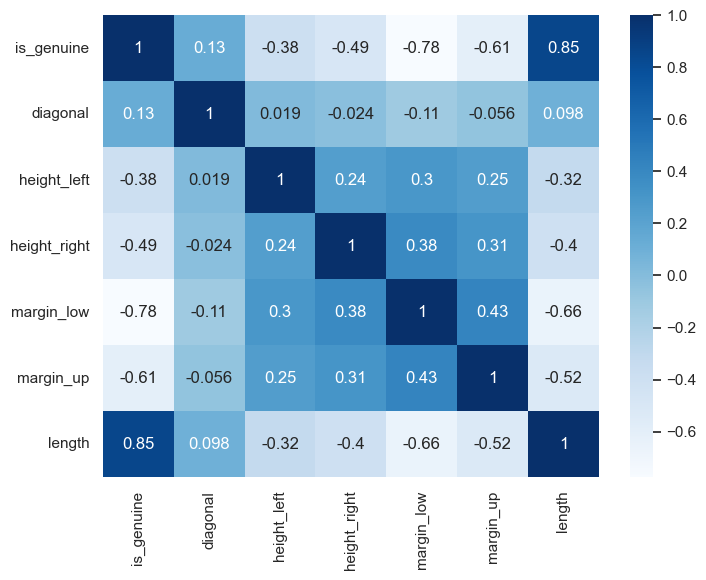

In [10]:
plt.figure(figsize = (8, 6))

sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

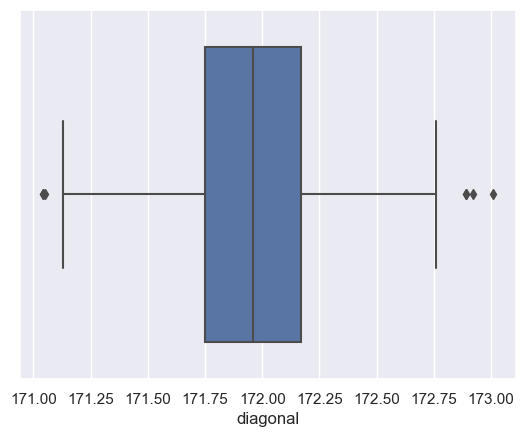

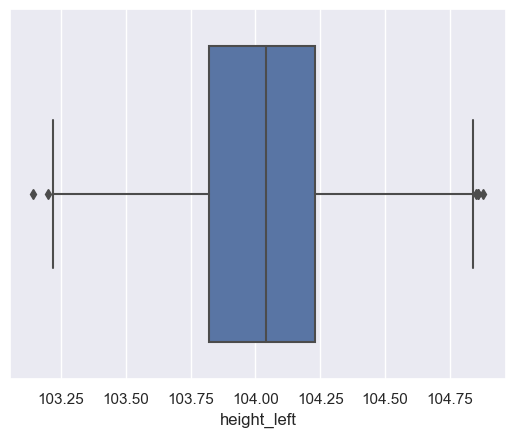

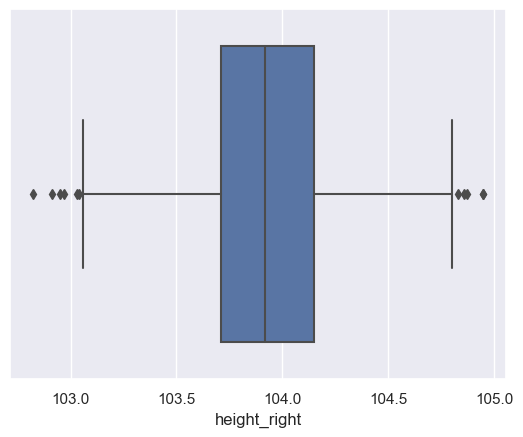

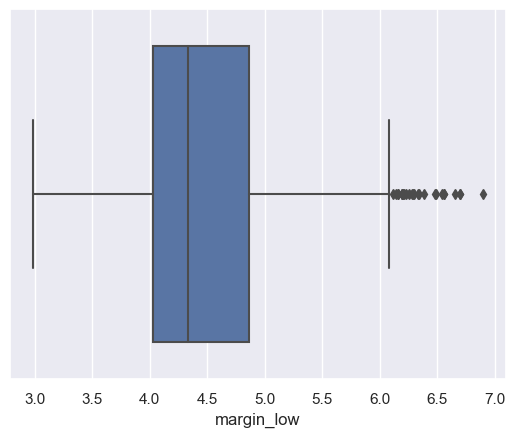

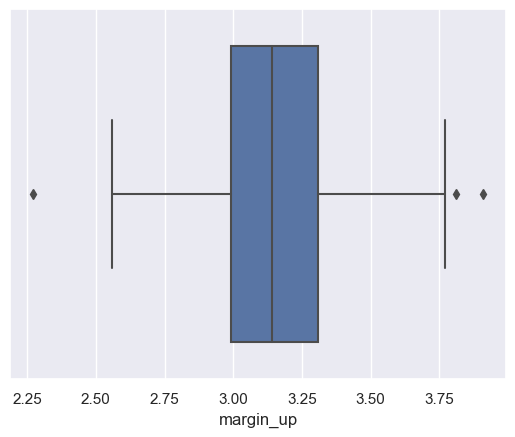

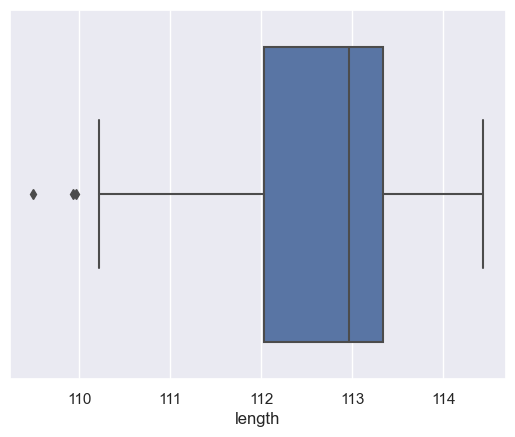

In [11]:
for i in data.columns:
    if i != 'is_genuine':
        sns.boxplot(x = data[i], data = data)
        plt.show()

# Removing outliers

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

Upper = Q3 + 1.5 * IQR
Lower = Q1 - 1.5 * IQR

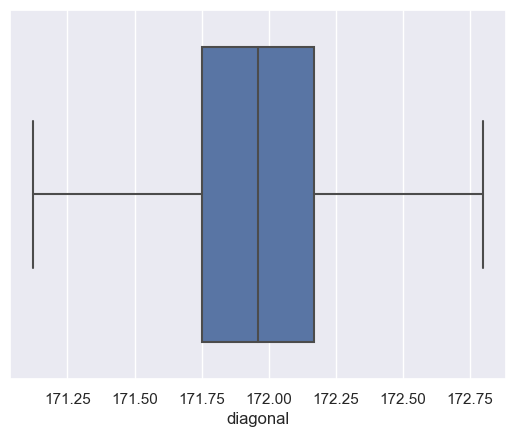

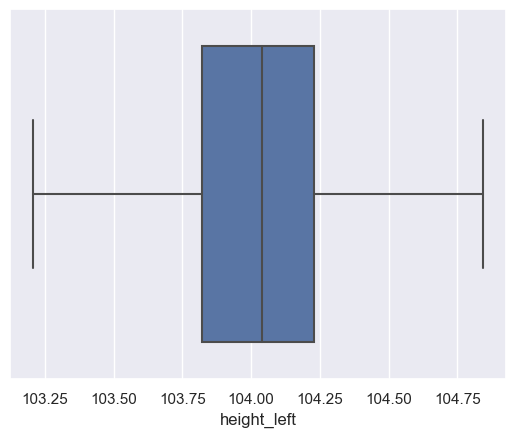

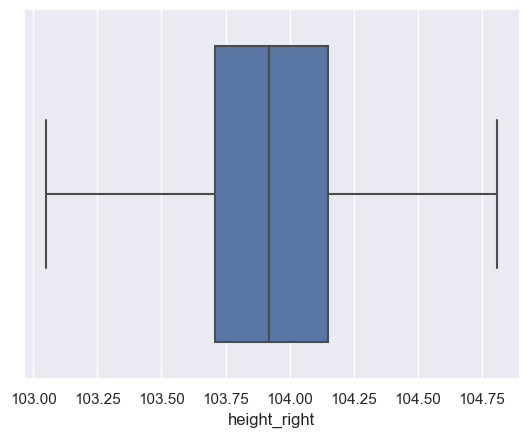

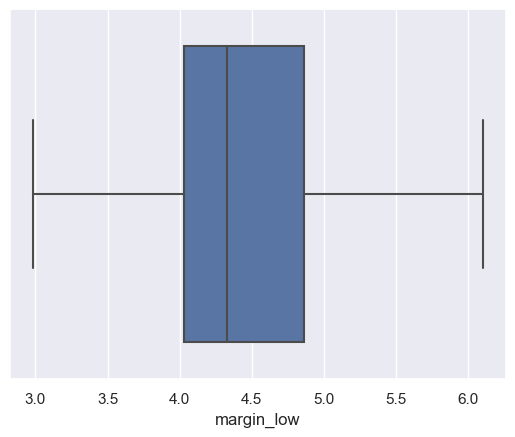

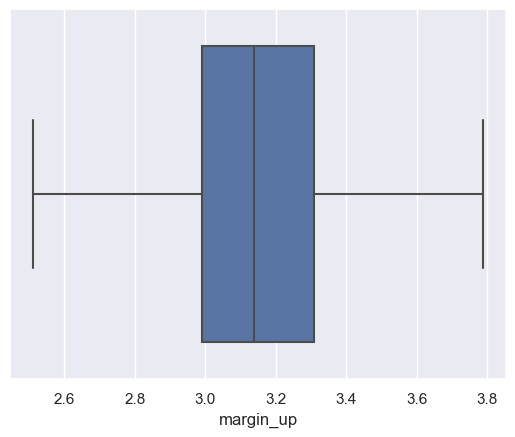

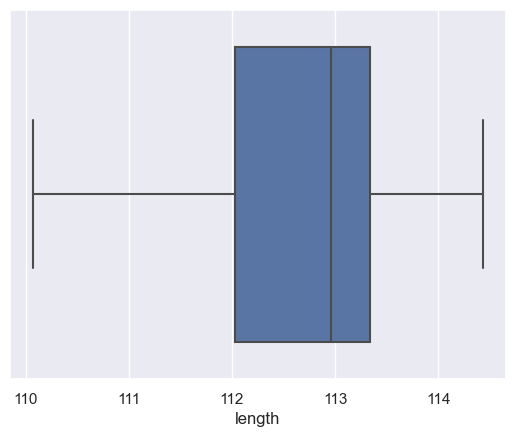

In [13]:
for i in data.columns:
    if i!='is_genuine':
        data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
        data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [14]:
from scipy import stats

for i in data.columns:
    if data[i].dtype == int or data[i].dtype == float:
        kstest_statistics, kstest_p_value = stats.kstest(data[i], 'norm')
        
        print(f'Column {i}')
        print(f'Test statistics : {kstest_statistics}')
        print(f'p-value : {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data is normally distributed')
            print()
        else:
            print('Data is not normally distributed')
            print()

Column diagonal
Test statistics : 1.0
p-value : 0.0
Data is not normally distributed

Column height_left
Test statistics : 1.0
p-value : 0.0
Data is not normally distributed

Column height_right
Test statistics : 1.0
p-value : 0.0
Data is not normally distributed

Column margin_low
Test statistics : 0.99855875808266
p-value : 0.0
Data is not normally distributed

Column margin_up
Test statistics : 0.9940997251697775
p-value : 0.0
Data is not normally distributed

Column length
Test statistics : 1.0
p-value : 0.0
Data is not normally distributed



In [15]:
data.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [16]:
def target_correlation(data, target, threshold=0.5):
    corr_matrix = data.corr(method='spearman')  
    target_correlations = corr_matrix[target].abs() > threshold 
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    return result_explaining_target

target_result = target_correlation(data, 'is_genuine')

target_result

,Variable,Correlation with Target
0,margin_low,-0.746409
1,margin_up,-0.609182
2,length,0.790311


In [17]:
def intercorrelation(data, target, threshold=0.7):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman')
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data, 'is_genuine')
intercorrelated_result

,Variable 1,Variable 2


In [18]:
target_result.Variable.tolist()

['margin_low', 'margin_up', 'length']

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, ['margin_low', 'margin_up'])

vif_result

,VIF,Features
0,60.432288,margin_low
1,60.432288,margin_up


In [20]:
vif_result.Features.tolist()

['margin_low', 'margin_up']

In [21]:
y = data['is_genuine']
X = data.drop('is_genuine', axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
data.dtypes

is_genuine        int64
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [24]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.845,104.81,4.52,2.89,112.83
1,1,171.46,103.360,103.66,3.77,2.99,113.09
2,1,172.69,104.480,103.50,4.40,2.94,113.16
3,1,171.36,103.910,103.94,3.62,3.01,113.51
4,1,171.73,104.280,103.46,4.04,3.48,112.54


In [25]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
reg.intercept_

array([-0.01632696])

In [27]:
reg.coef_

array([[-0.11772483, -1.619562  , -2.00989863, -3.23248347, -2.78012342,
         3.74984854]])

In [28]:
y_pred = reg.predict(X_test)

In [29]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [31]:
confusion_matrix

array([[156,   5],
       [  1, 288]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       161
           1       0.98      1.00      0.99       289

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.99       450
weighted avg       0.99      0.99      0.99       450

